# <div align='center'> 数据集分析 </div>

In [1]:
%reload_ext autoreload
%reload_ext tensorboard
%autoreload 2
%matplotlib inline

In [2]:
from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT
from PIL import Image

import os
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
import json

In [3]:
sns.set_style('white')

In [4]:
# debug_datasets = ['Boats', 'mnist']
debug_datasets = []

In [5]:
def pandas_datasets(datasets_root):
    df_all = {}
    debug = True if debug_datasets and len(debug_datasets) > 0 else False
    for dataset in os.scandir(os.path.join(datasets_root, 'cv')):
        if debug and dataset.name not in debug_datasets:
            continue
        train_file = os.path.join(dataset, 'train.json')
        if not os.path.exists(train_file):
            continue
        val_file = os.path.join(dataset, 'val.json')
        if not os.path.exists(val_file):
            continue
        test_file = os.path.join(dataset, 'test.json')
        if not os.path.exists(test_file):
            continue
            
        df_train = pd.read_json(train_file)
        df_val = pd.read_json(val_file)
        df_test = pd.read_json(test_file)
        df_train['type'] = 'train'
        df_val['type'] = 'val'
        df_test['type'] = 'test'
        
        df_all[dataset.name] = pd.concat([df_train, df_val, df_test])
        
    return df_all

In [6]:
datasets = pandas_datasets(K12AI_DATASETS_ROOT)

In [10]:
print(tuple(datasets.keys()))

('Fruits360', 'cellular', 'kannada', 'FashionMNIST', 'EMNIST_Digits', 'cifar10', 'dogsVsCats', 'Boats', 'mnist', 'Chars74K', 'cactus', 'EMNIST_MNIST', 'Dogs', 'EMNIST_Letters', 'Animals', 'EMNIST_Balanced')


In [8]:
def draw_hist(dataset, df):
    plt.clf()
    fig = plt.figure(figsize=(12, 12))
    plt.title(dataset)
    bins = max(df['label'])
    bins = bins if bins < 100 else 100
    for ty, co in (('train', 'r'), ('val', 'g'), ('test', 'b')):
        sns.distplot(df[df['type'] == ty]['label'],
                     # fit=scipy.stats.norm,
                     kde=False,
                     hist=True,
                     hist_kws={"linewidth": 2, "alpha": 0.8, 'color': co},
                     # rug=True,
                     bins=bins+1,
                     label=ty)
    plt.legend()
    plt.savefig(f'{K12AI_DATASETS_ROOT}/cv/{dataset}/label_hist.png')
    plt.show()
    
def draw_all_hist(df_datasets):
    for dataset, df in df_datasets.items():
        draw_hist(dataset, df)

<Figure size 432x288 with 0 Axes>

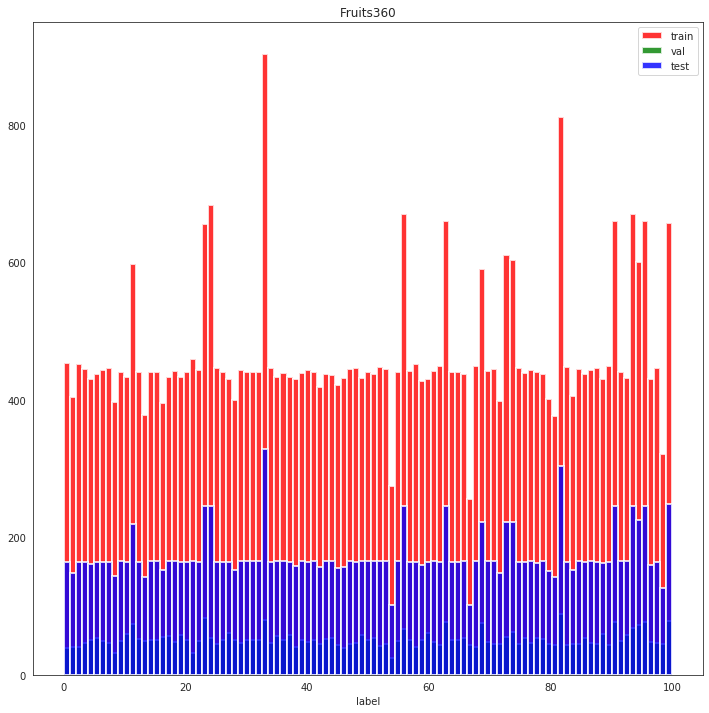

<Figure size 432x288 with 0 Axes>

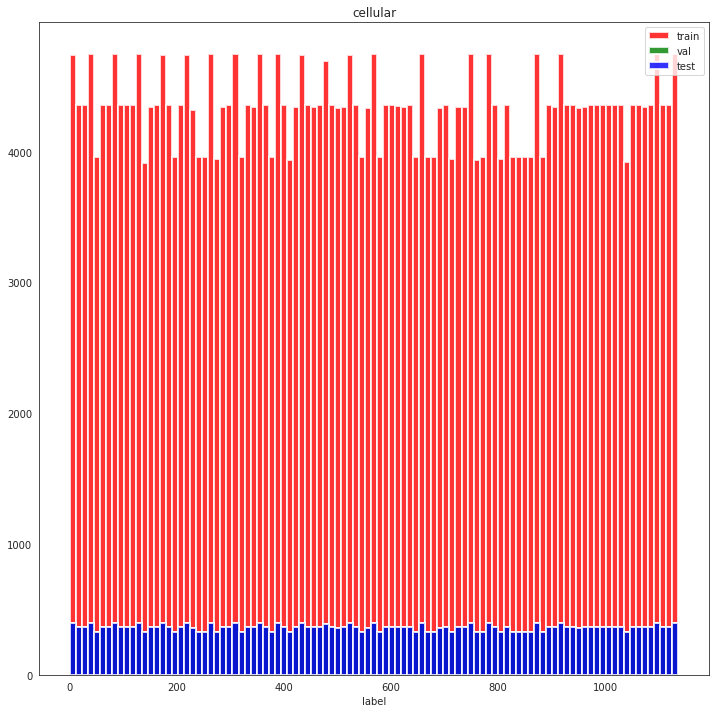

<Figure size 432x288 with 0 Axes>

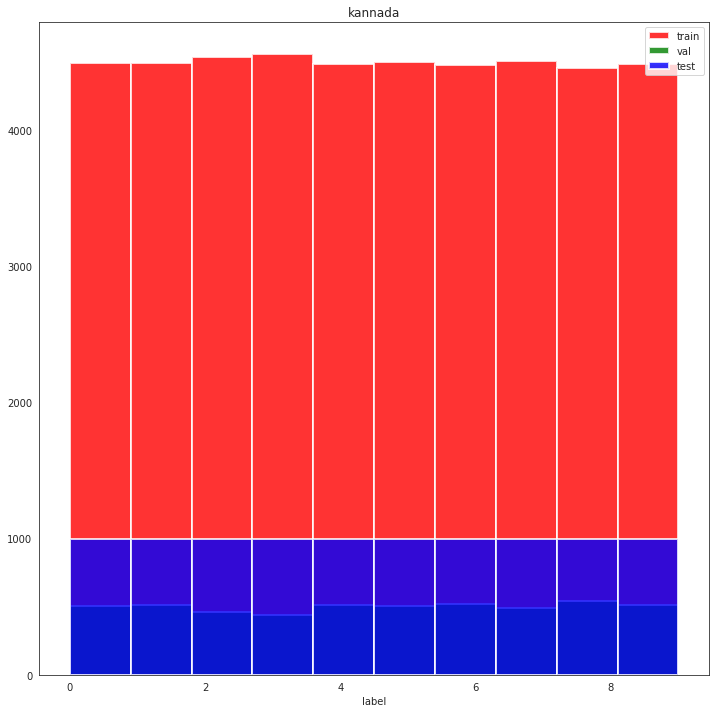

<Figure size 432x288 with 0 Axes>

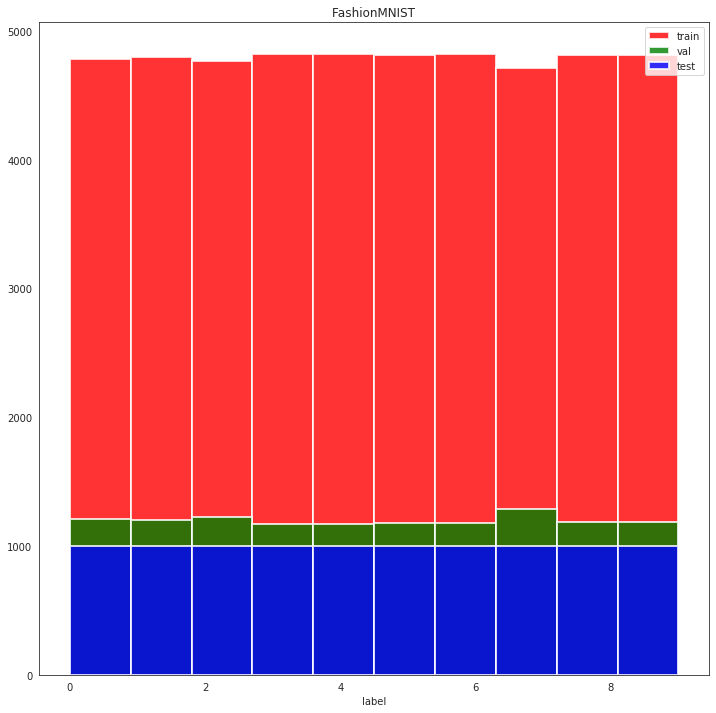

<Figure size 432x288 with 0 Axes>

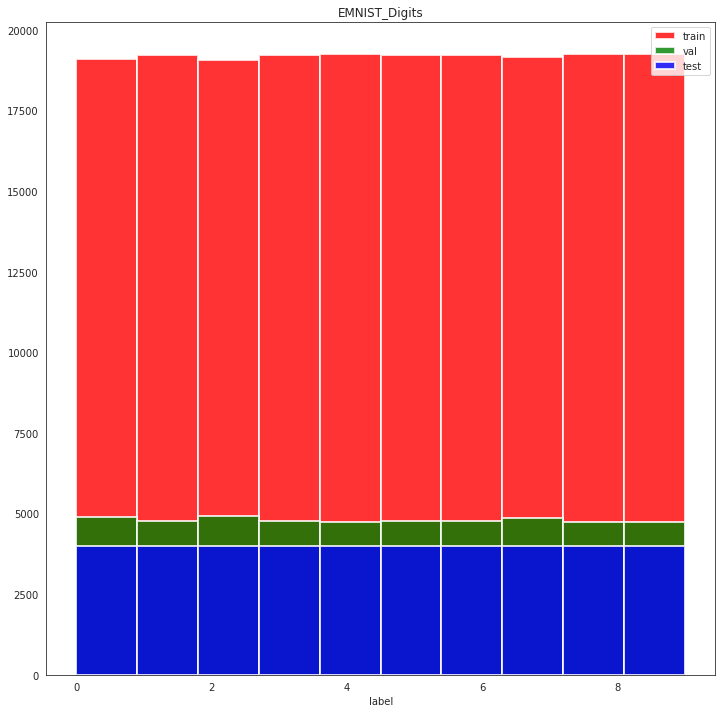

<Figure size 432x288 with 0 Axes>

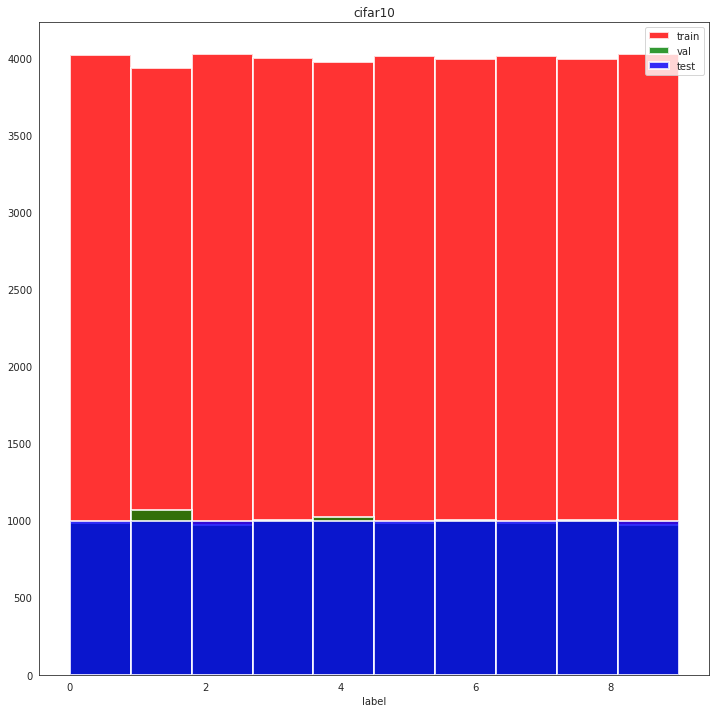

<Figure size 432x288 with 0 Axes>

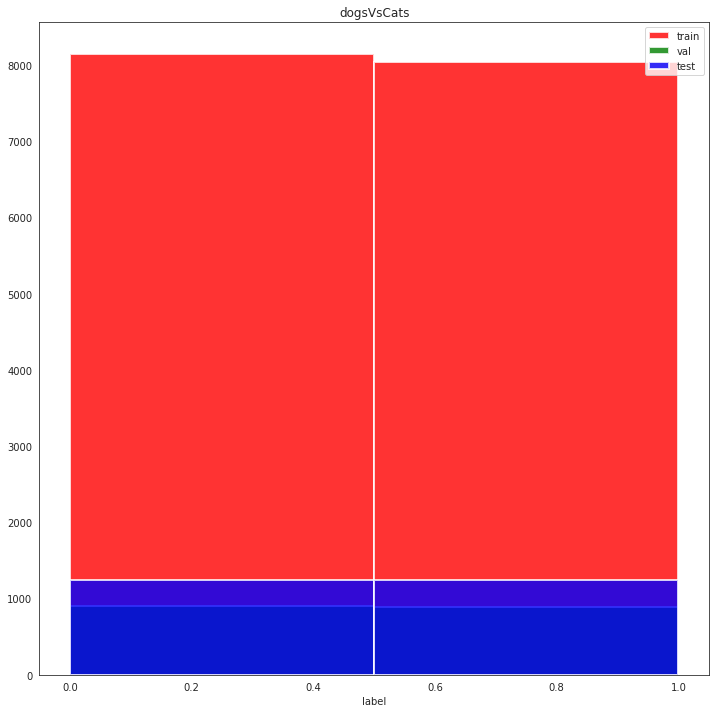

<Figure size 432x288 with 0 Axes>

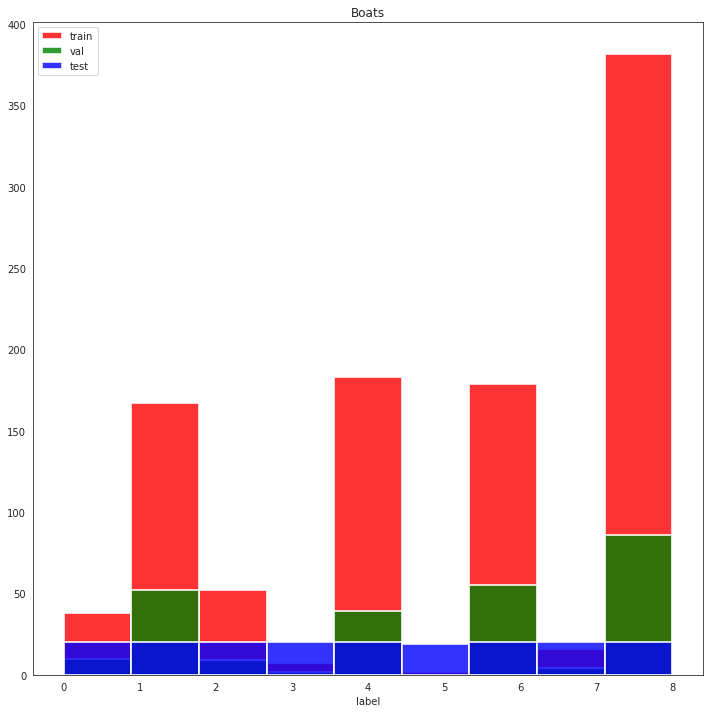

<Figure size 432x288 with 0 Axes>

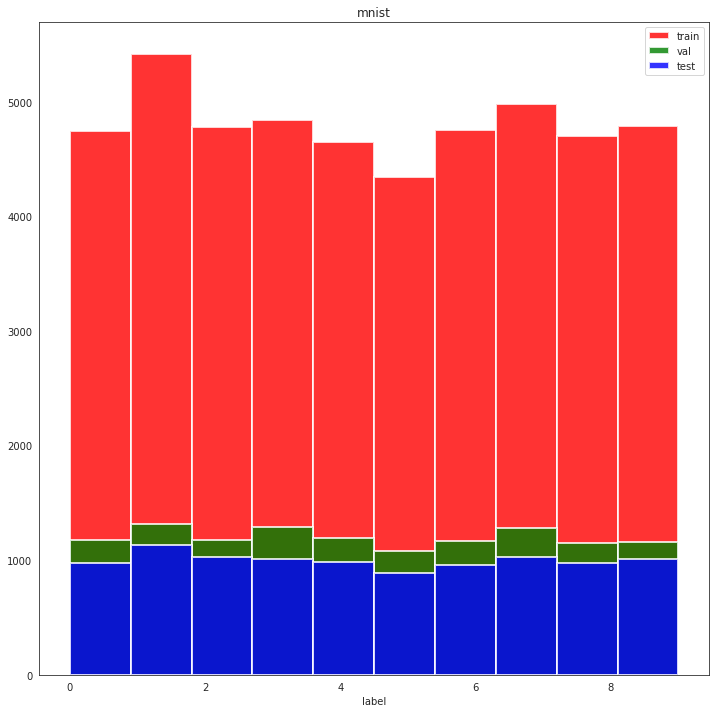

<Figure size 432x288 with 0 Axes>

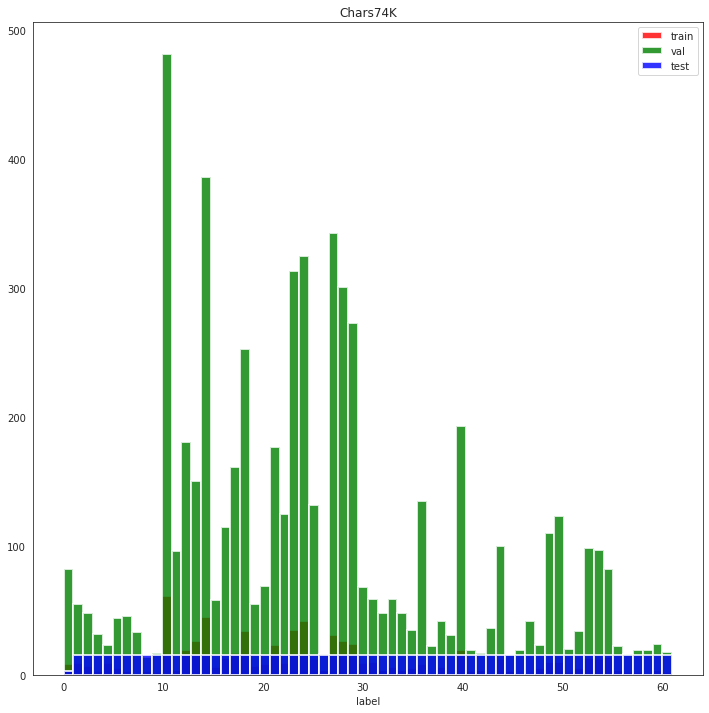

<Figure size 432x288 with 0 Axes>

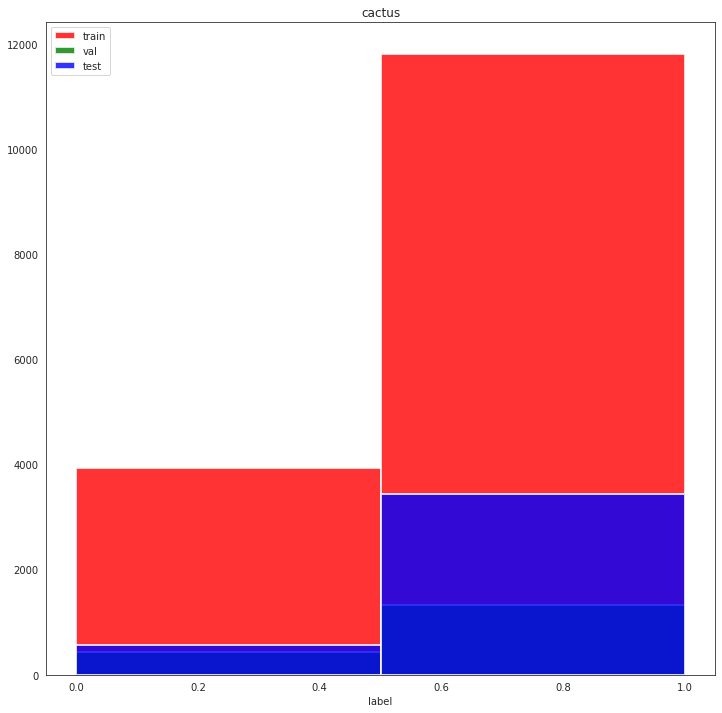

<Figure size 432x288 with 0 Axes>

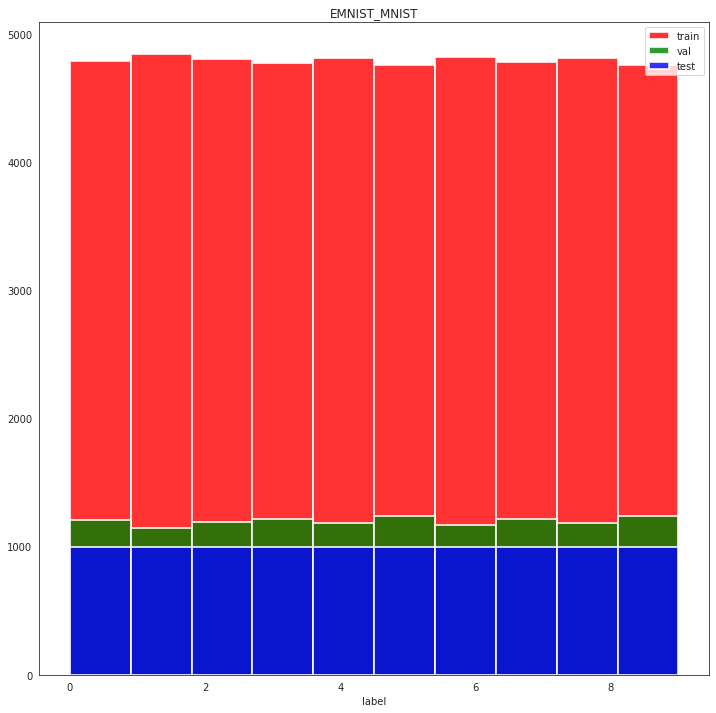

<Figure size 432x288 with 0 Axes>

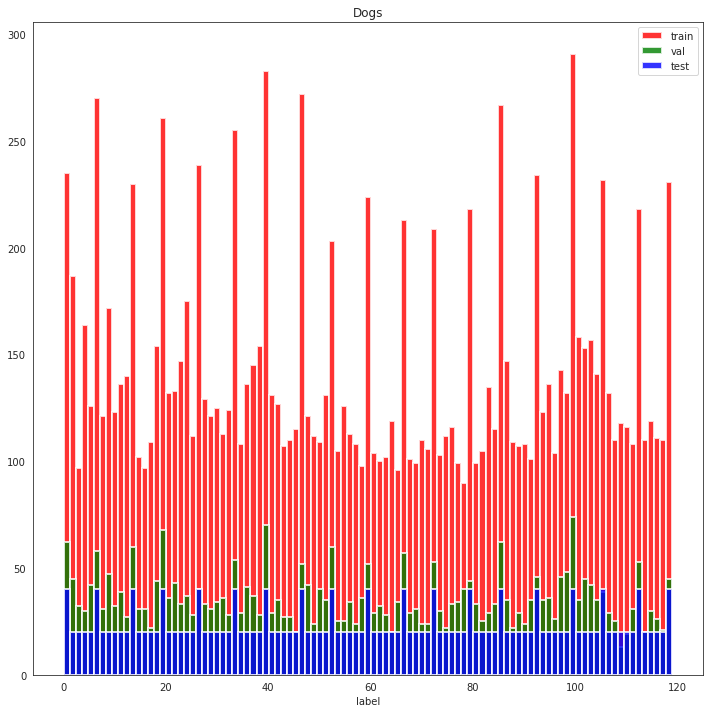

<Figure size 432x288 with 0 Axes>

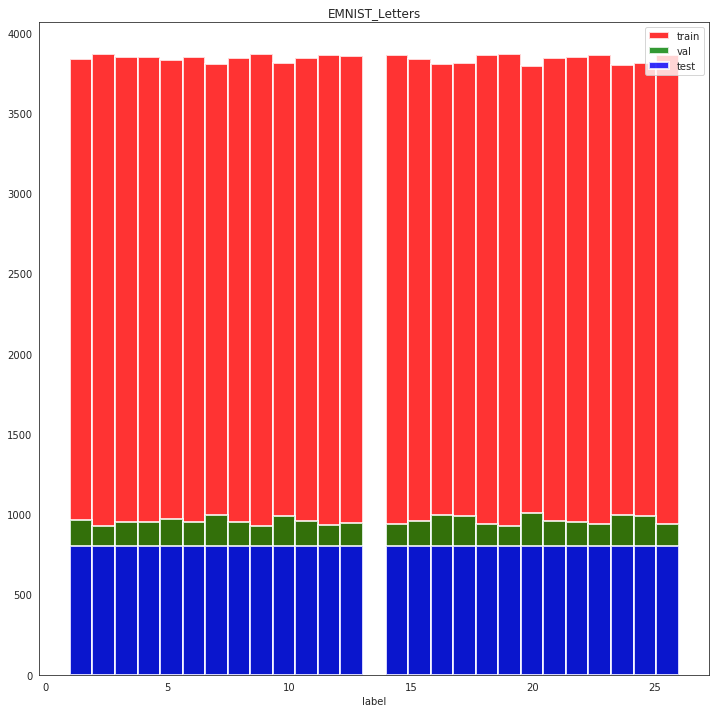

<Figure size 432x288 with 0 Axes>

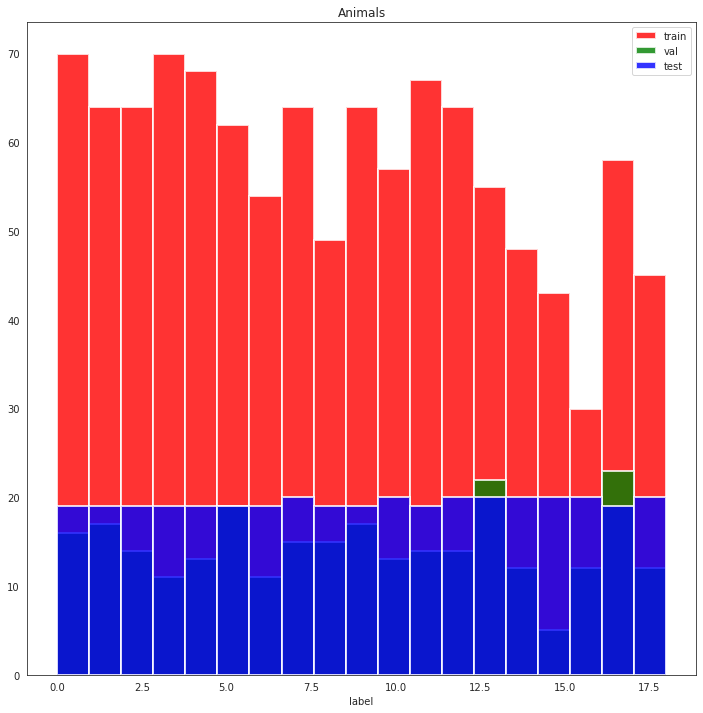

<Figure size 432x288 with 0 Axes>

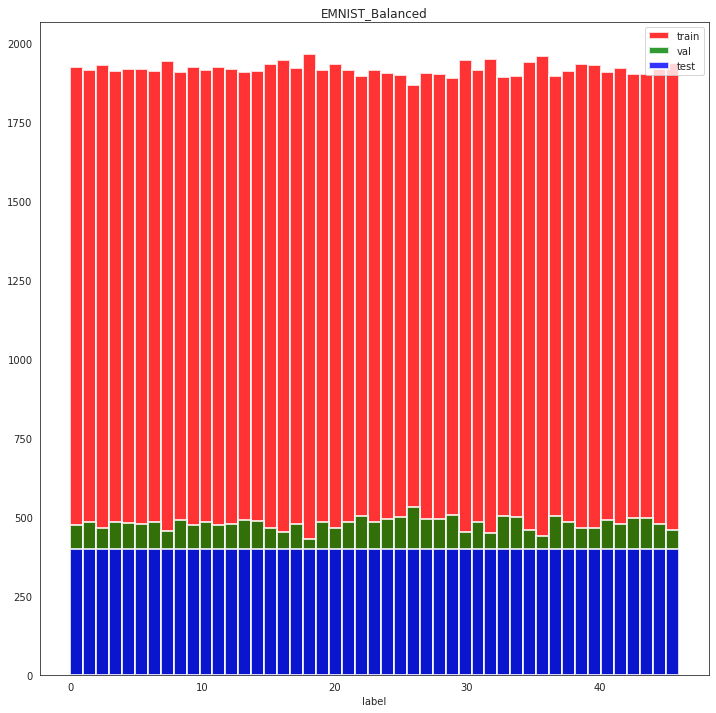

In [9]:
draw_all_hist(datasets)